### Importing libaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

### Loading data

In [3]:
data = pd.read_csv('open_pubs.csv')

### Shape of the data

In [4]:
data.shape

(51331, 9)

#### There are 51330 data points and 9 columns.

### Checking head of the data

In [5]:
data.head()

,fsa_id,name,address,postcode,easting,northing,lattitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.97934,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh


### Replacing special characters in lattitude and longitude

In [6]:
data.replace('\\N', np.nan, inplace=True)

In [7]:
data.head()

,fsa_id,name,address,postcode,easting,northing,lattitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.97934,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,NaN,NaN,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,NaN,NaN,Babergh


### Checking information of the data

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51331 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fsa_id           51331 non-null  int64 
 1   name             51331 non-null  object
 2   address          51331 non-null  object
 3   postcode         51331 non-null  object
 4   easting          51331 non-null  int64 
 5   northing         51331 non-null  int64 
 6   lattitude        50564 non-null  object
 7   longitude        50564 non-null  object
 8   local_authority  51331 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


##### Here fsa_id,easting and northing are int data type. Remaing all features are object data types.

### Checking five point summary for the numerical data

In [9]:
data.describe()

,fsa_id,easting,northing
count,51331.000000,51331.000000,5.133100e+04
mean,299395.371861,429857.397810,2.271941e+05
std,169362.451341,98559.032868,7.277388e+05
min,22.000000,78110.000000,-5.527598e+06
25%,167750.000000,361449.000000,1.792440e+05
50%,303719.000000,428772.000000,2.872490e+05
75%,438957.500000,509796.500000,4.089420e+05
max,597137.000000,655277.000000,1.209661e+06


### Checking the duplicate values in the data

In [10]:
data.duplicated().sum()

0

##### There are no duplicate values in the data.

### Checking missing values

In [11]:
data.isna().sum()

fsa_id               0
name                 0
address              0
postcode             0
easting              0
northing             0
lattitude          767
longitude          767
local_authority      0
dtype: int64

##### There are 767 missing values in the lattitude and longitude.

### Dropping missing values

In [12]:
data.dropna(inplace=True)

In [13]:
data.isna().sum()

fsa_id             0
name               0
address            0
postcode           0
easting            0
northing           0
lattitude          0
longitude          0
local_authority    0
dtype: int64

### Converting data types

In [14]:
data["lattitude"] = data["lattitude"].astype(float)

In [15]:
data["longitude"] = data["longitude"].astype(float)

In [16]:
data.dtypes

fsa_id               int64
name                object
address             object
postcode            object
easting              int64
northing             int64
lattitude          float64
longitude          float64
local_authority     object
dtype: object

##### Now the data types of lattitude and longitude has been changed to flaot. 

### checking unique values

In [17]:
data.nunique()

fsa_id             50564
name               35809
address            49291
postcode           45231
easting            43228
northing           43895
lattitude          46809
longitude          46806
local_authority      360
dtype: int64

In [33]:
data.to_csv("New_pub_data.csv",index=False)

<AxesSubplot:>

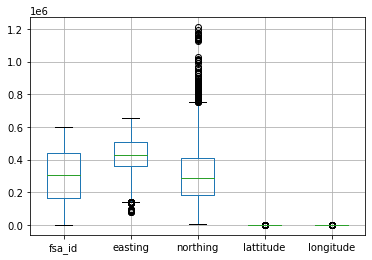

In [34]:
data.boxplot()

[Text(0, 0, '193'),
 Text(0, 0, '170'),
 Text(0, 0, '130'),
 Text(0, 0, '112'),
 Text(0, 0, '102')]

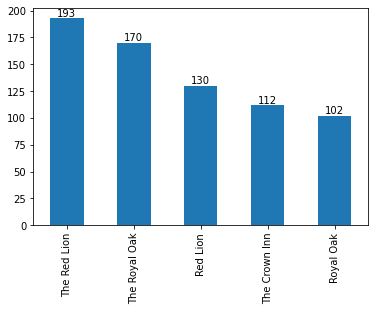

In [61]:
ax = data["name"].value_counts()[:5].plot.bar()
ax.bar_label(ax.containers[0])

[Text(0, 0, '680'),
 Text(0, 0, '611'),
 Text(0, 0, '557'),
 Text(0, 0, '544'),
 Text(0, 0, '524')]

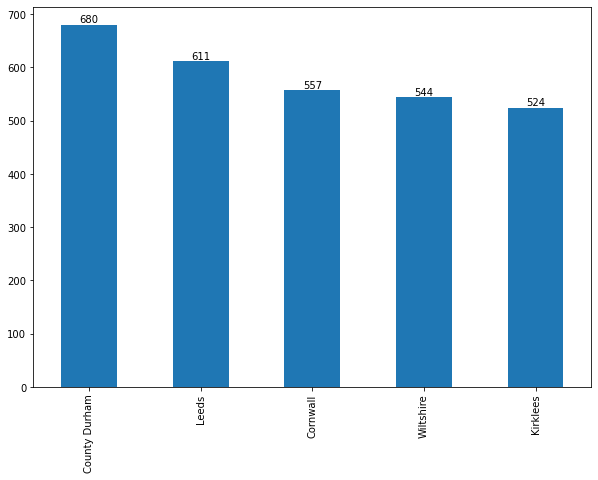

In [62]:
fig = plt.figure(figsize = (10, 7))
ax = data["local_authority"].value_counts()[:5].plot.bar()
ax.bar_label(ax.containers[0])

<AxesSubplot:>

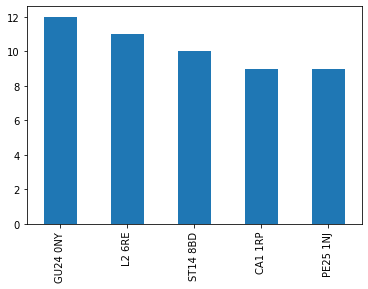

In [47]:
data["postcode"].value_counts()[:5].plot.bar()